In [14]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [45]:
target = 'ltt1445a'
ra = 45.462
dec = -16.594
step_size = 10.
img_step_size = 30.
img_size = (0.1, 0.1)
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

In [46]:
from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap

In [47]:
exposures = gFind(band='Both',skypos=[ra,dec],maxgap=100.,minexp=100.)

NUV: 1785.0s (raw) in 2 exposures.
    [ 815463305.995, 815463418.995 ], 113.000 seconds
    [ 876378756.995, 876380428.995 ], 1672.000 seconds
FUV: 1785.0s (raw) in 2 exposures.
    [ 815463305.995, 815463418.995 ], 113.000 seconds
    [ 876378756.995, 876380428.995 ], 1672.000 seconds


In [48]:
# gMap(band="nuv", skypos=[ra, dec], stepsz=img_step_size, skyrange=img_size,
#         cntfile='galex_output/'+target+'_nuv_cube.fits', cntcoaddfile='galex_output/'+target+'nuv_coadd.fits', verbose=3,
#         trange=[876378756, 876380428], overwrite=True)
#
gMap(band="nuv", skypos=[ra, dec], skyrange=img_size, cntfile='galex_output/'+target+'_nuv_cube.fits', verbose=3, overwrite=True)
# gMap.check_args()

TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

In [9]:
nuv_photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius=phot_rad,
                             annulus=[ap_in, ap_out], verbose=3, csvfile='galex_output/{}_nuv_{}slc.csv'.format(target, step_size), 
                              overwrite=True)

Using v1.28.9 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [45.462, -16.594]
 tranges: None
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  10.0
 csvfile: galex_output/ltt1445a_nuv_10.0slc.csv
 verbose: 3


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/gPhoton/curvetools.py:427: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(counts/expt**2+bgcounts/expt**2)


In [24]:
nuv= Table.read('galex_output/{}_nuv_{}slc.csv'.format(target, step_size))


4.332645288899168e-16


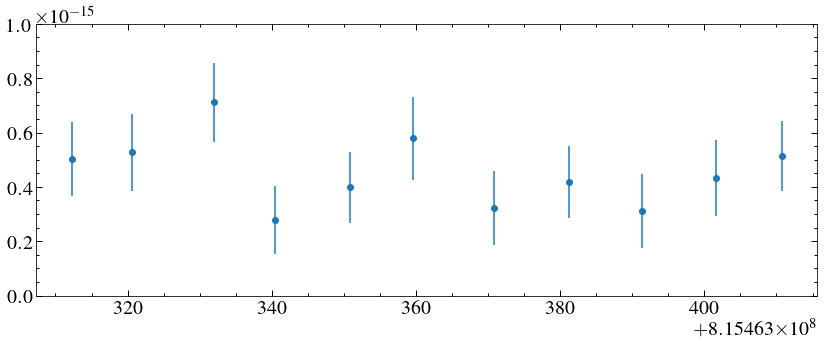

5.684033334346443e-16


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


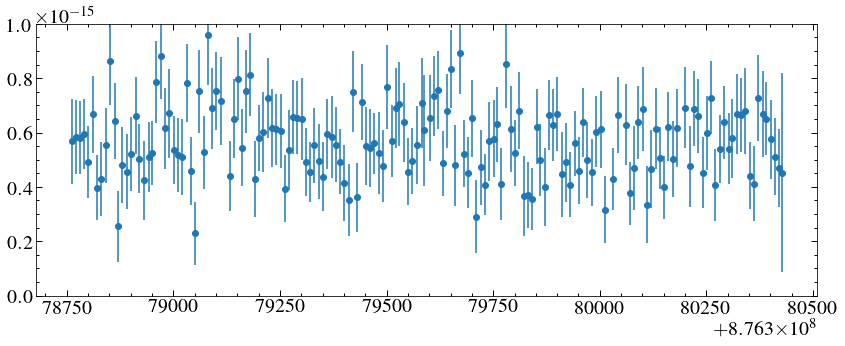

In [20]:
t, f, e, q = nuv['t_mean'], nuv['flux_bgsub'], nuv['flux_bgsub_err'], nuv['flags']
t, f, e = t[q==0], f[q==0], e[q==0]
#plt.errorbar(t-t[0], f, yerr=e, ls='none', marker='o')
t0s, t1s = exposures['NUV']['t0'], exposures['NUV']['t1']
for t0, t1 in zip(t0s, t1s):
    mask = (t >=t0) & (t <=t1)
    print(np.median(f[mask]))
    plt.errorbar(t[mask], f[mask], yerr=e[mask], ls='none', marker='o')
#     plt.xlim(t0-20, t0+1397.)
    plt.ylim(0, 1e-15)
    plt.show()
   # if (t1 - t0) > 900:
#     lc = lk.LightCurve(time=t[mask]*u.s, flux=f[mask], flux_err=e[mask])
#     pg = lc.to_periodogram(oversample_factor= 10, minimum_period=20*u.s, maximum_period=200*u.s)
#     plt.plot(pg.period.to(u.s), pg.power)
#     print(pg.period_at_max_power.to(u.s))
    
#     plt.show()
    

In [21]:
fuv_photon_events = gAperture(band='FUV', skypos=[ra, dec], stepsz=step_size, radius=phot_rad,
                             annulus=[ap_in, ap_out], verbose=3, csvfile='galex_output/{}_fuv_{}slc.csv'.format(target, step_size), 
                              overwrite=True)

Using v1.28.9 of gAperture.
Generating a light curve with the following paramters:
 band:    FUV
 skypos:  [45.462, -16.594]
 tranges: None
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  10.0
 csvfile: galex_output/ltt1445a_fuv_10.0slc.csv
 verbose: 3
[========================================]  2.44Mb / 2.44Mb    


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/gPhoton/MCUtils.py:54: RuntimeWarning: overflow encountered in square
  return np.sqrt((a-c)**2. + (b-d)**2.)
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/gPhoton/curvetools.py:427: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(counts/expt**2+bgcounts/expt**2)


[========================================]  2.44Mb / 2.44Mb    


In [23]:
fuv= Table.read('galex_output/{}_fuv_{}slc.csv'.format(target, step_size))


3.5165910131255464e-16


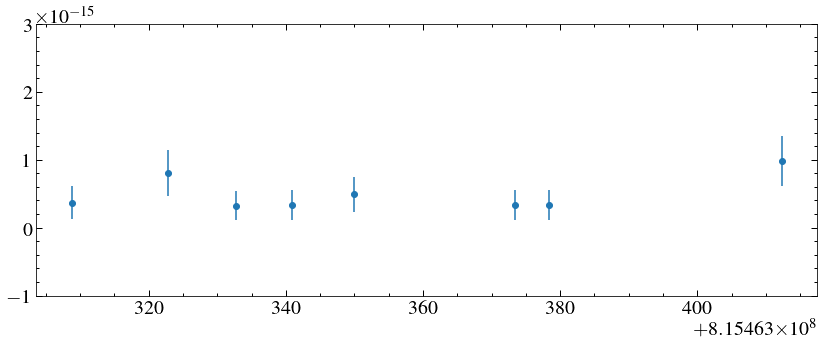

3.1091744977889693e-16


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


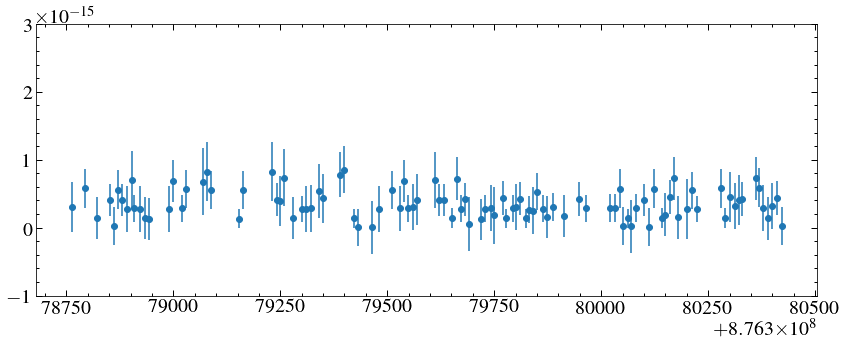

In [30]:
t, f, e, q = fuv['t_mean'], fuv['flux_bgsub'], fuv['flux_bgsub_err'], fuv['flags']
t, f, e = t[q==0], f[q==0], e[q==0]
t, f, e = t[f>0], f[f>0], e[f>0]

#plt.errorbar(t-t[0], f, yerr=e, ls='none', marker='o')
t0s, t1s = exposures['NUV']['t0'], exposures['NUV']['t1']
for t0, t1 in zip(t0s, t1s):
    mask = (t >=t0) & (t <=t1)
    print(np.median(f[mask]))
    plt.errorbar(t[mask], f[mask], yerr=e[mask], ls='none', marker='o')
#     plt.xlim(t0-20, t0+1397.)
    plt.ylim(-1e-15, 3e-15)
    plt.show()
   # if (t1 - t0) > 900:
#     lc = lk.LightCurve(time=t[mask]*u.s, flux=f[mask], flux_err=e[mask])
#     pg = lc.to_periodogram(oversample_factor= 10, minimum_period=20*u.s, maximum_period=200*u.s)
#     plt.plot(pg.period.to(u.s), pg.power)
#     print(pg.period_at_max_power.to(u.s))
    
#     plt.show()
    